In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("main.csv",parse_dates=['Date'])
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data['Province/State'].fillna('',inplace=True)
data

,Province/State,Country,Date,confirmed_case,Death_case
0,,Afghanistan,2020-01-22,0,0
1,,Albania,2020-01-22,0,0
2,,Algeria,2020-01-22,0,0
3,,Andorra,2020-01-22,0,0
4,,Angola,2020-01-22,0,0
...,...,...,...,...,...
51333,,Sao Tome and Principe,2020-08-01,874,15
51334,,Yemen,2020-08-01,1730,494
51335,,Comoros,2020-08-01,386,7
51336,,Tajikistan,2020-08-01,7451,60


In [4]:
data

,Province/State,Country,Date,confirmed_case,Death_case
0,,Afghanistan,2020-01-22,0,0
1,,Albania,2020-01-22,0,0
2,,Algeria,2020-01-22,0,0
3,,Andorra,2020-01-22,0,0
4,,Angola,2020-01-22,0,0
...,...,...,...,...,...
51333,,Sao Tome and Principe,2020-08-01,874,15
51334,,Yemen,2020-08-01,1730,494
51335,,Comoros,2020-08-01,386,7
51336,,Tajikistan,2020-08-01,7451,60


In [5]:
data.isna().sum()

Province/State    0
Country           0
Date              0
confirmed_case    0
Death_case        0
dtype: int64

In [6]:
country_cases=pd.DataFrame(data.groupby('Country')['confirmed_case','Death_case'].sum().sort_values(by='confirmed_case',ascending=False).reset_index())
country_cases

,Country,confirmed_case,Death_case
0,US,246806711,11771424
1,Brazil,102540887,4394008
2,Russia,49573324,688269
3,India,49078553,1290572
4,Spain,28836131,3175242
...,...,...,...
183,Saint Kitts and Nevis,1857,0
184,Papua New Guinea,1537,9
185,Holy See,1416,0
186,MS Zaandam,1115,246


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

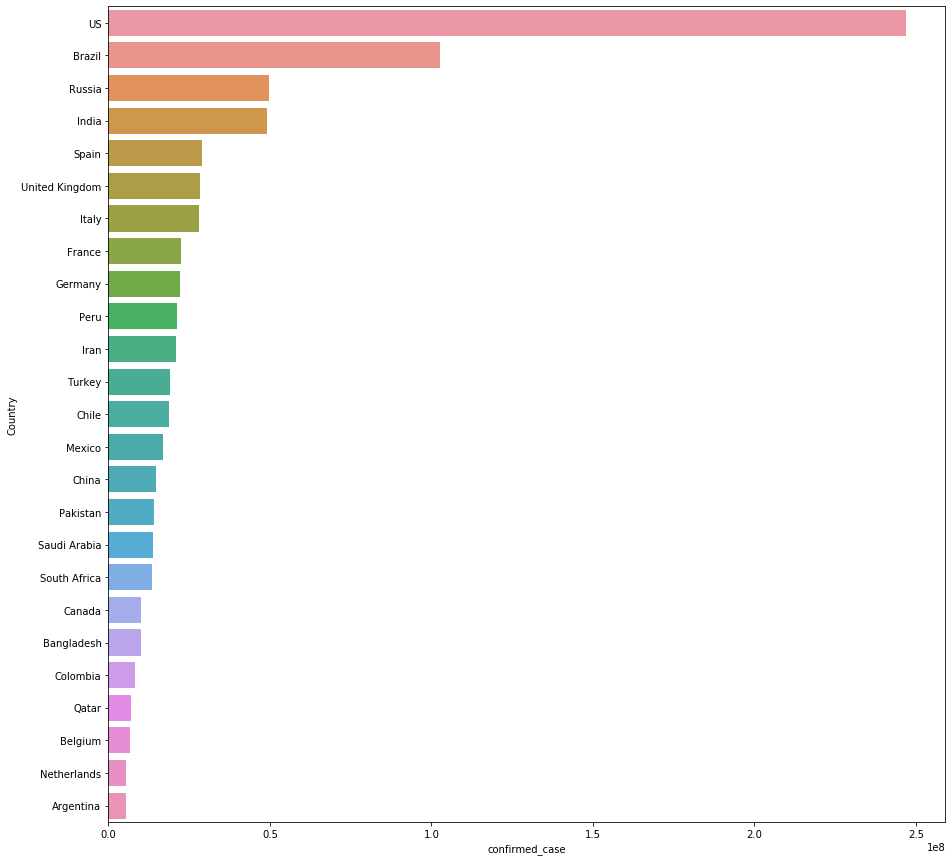

In [8]:
plt.figure(figsize=(15,15))
sns.barplot(y='Country',x='confirmed_case',data=country_cases[:25])

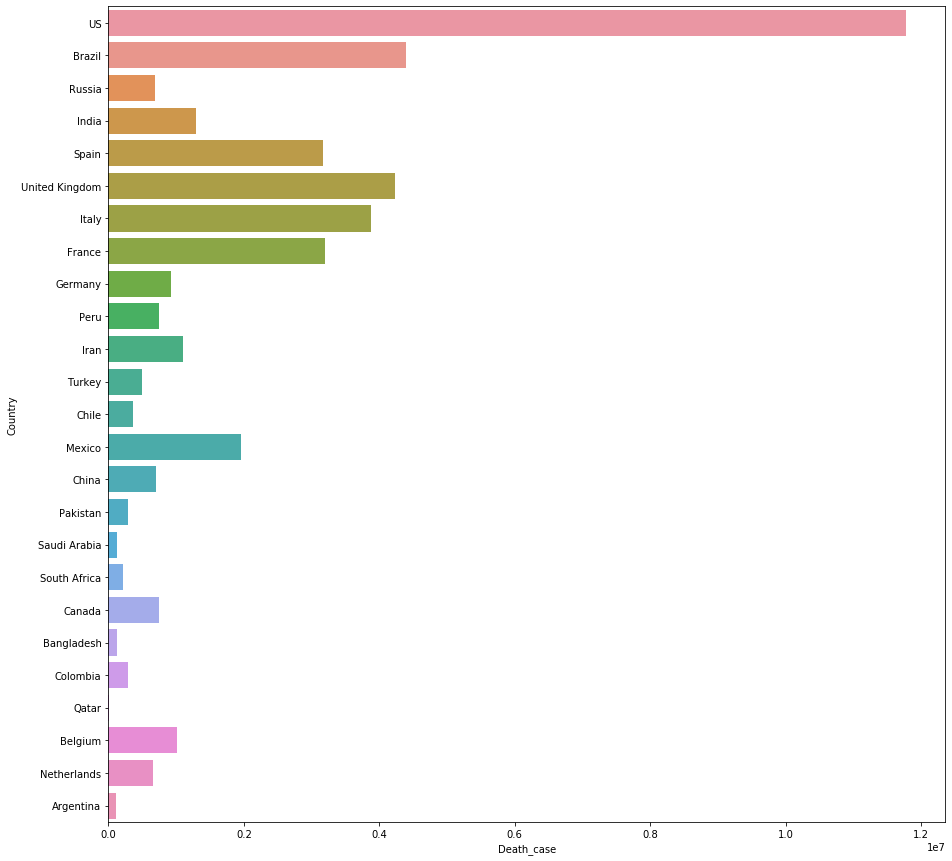

In [9]:
plt.figure(figsize=(15,15))
sns.barplot(y='Country',x='Death_case',data=country_cases[:25])

In [10]:
#Data for Nepal
Nepal=data.query('Country=="Nepal"').groupby("Date")[['confirmed_case', 'Death_case']].sum().reset_index()

In [11]:
Nepal

,Date,confirmed_case,Death_case
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,1,0
4,2020-01-26,1,0
...,...,...,...
188,2020-07-28,19063,49
189,2020-07-29,19273,49
190,2020-07-30,19547,52
191,2020-07-31,19771,56


/home/sid/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


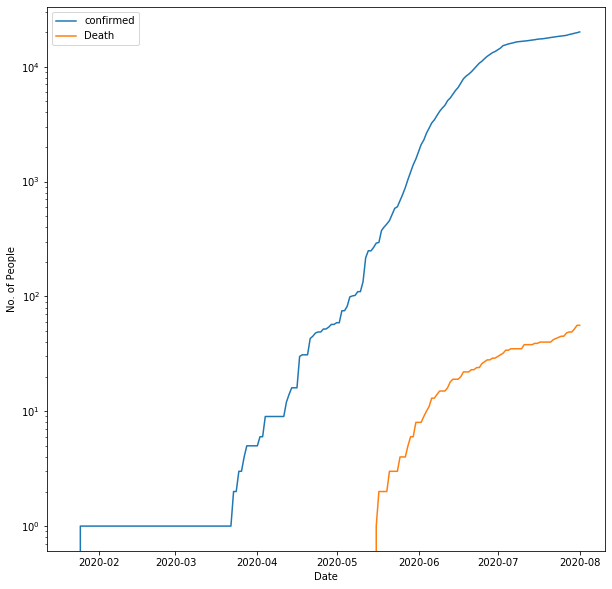

In [12]:
plt.figure(figsize=(10,10))
plt.plot('Date','confirmed_case',data=Nepal,label='confirmed')
plt.plot('Date','Death_case',data=Nepal,label='Death')
plt.legend()
plt.xlabel("Date")
plt.ylabel("No. of People")
plt.yscale(value="log")

In [13]:
China=data.query('Country=="China"').groupby('Date')['confirmed_case','Death_case'].sum().reset_index()

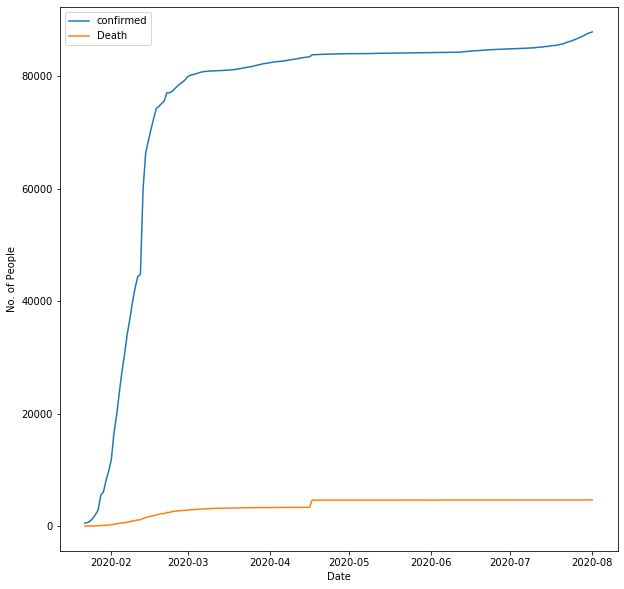

In [14]:
plt.figure(figsize=(10,10))
plt.plot('Date','confirmed_case',data=China,label='confirmed')
plt.plot('Date','Death_case',data=China,label='Death')
plt.legend()
plt.xlabel("Date")
plt.ylabel("No. of People")
plt.yscale("linear")

## Autocorrelation

Simply it is the correlation of current value and previous value know as lagged value. How similar is the data with its lagged version over sucessive time period. As other correlation values differs from -1 to 1 . -1 refers to negative correlation i.e. an increase in one time series leads to decrease in other. We can say it shows how importance past value is for the future value.

Corr(s,t) = sum((X(t)-mean(t)* X(s)-mean(s))/(sigma(s)* sigma(t))

We can say multipliation of two correlation

In [15]:
Nepal.confirmed_case.autocorr()
#each data and and data with difference 1

0.9997866104457792

In [16]:
Nepal.confirmed_case.autocorr(lag=10) # atas and datas with difference 10

0.9796382904928699

In [17]:
Nepal.confirmed_case.autocorr(lag=170)

0.5230217230586729

In [18]:
Nepal.Death_case.autocorr(lag=10)

0.9891982232269944

In [19]:
Nepal.Death_case.autocorr(lag=20)

0.962614370226514

### statsmodels have autocorrelation function given which can be used

In [20]:
from statsmodels.tsa.stattools import acf

In [21]:
autocorr = acf(Nepal.confirmed_case,nlags=175)

/home/sid/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


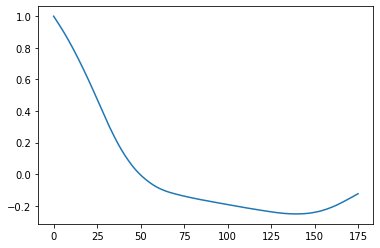

In [22]:
plt.plot(autocorr)

In [23]:
from pandas.plotting import autocorrelation_plot

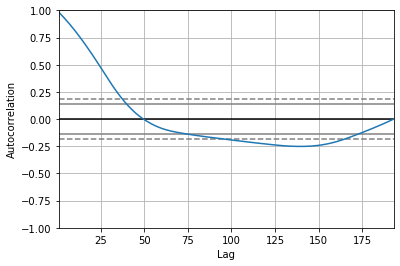

In [24]:
autocorrelation_plot(Nepal.confirmed_case)

### Now if we use stats models first method is to remove the trend

1. Detrending

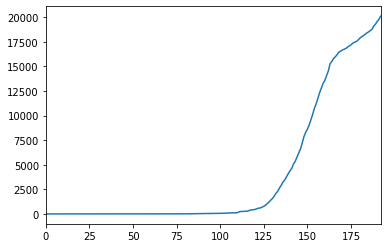

In [25]:
Nepal.confirmed_case.plot()

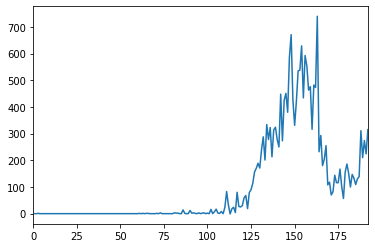

In [26]:
Nepal.confirmed_case.diff().plot()

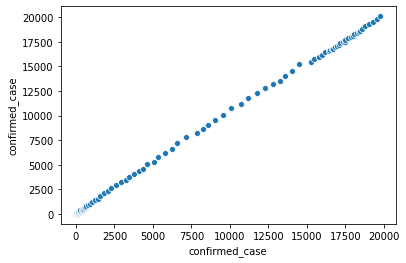

In [27]:
sns.scatterplot(x=Nepal['confirmed_case'].shift(1)[1:],y=Nepal['confirmed_case'][1:])

In [28]:
Nepal['diff']=Nepal['confirmed_case']-Nepal['confirmed_case'].shift(1)

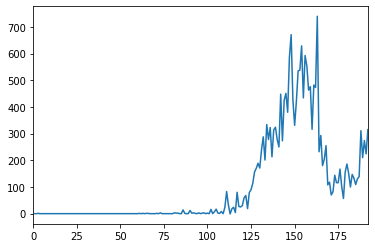

In [29]:
Nepal['diff'].plot()

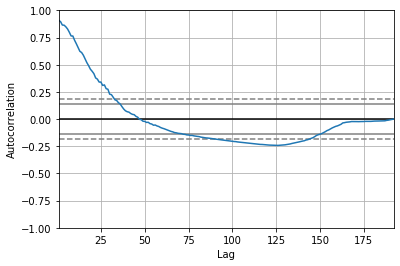

In [30]:
autocorrelation_plot(Nepal['diff'][1:])

In [31]:
pd.set_option("display.max_row",None)

In [32]:
Nepal

,Date,confirmed_case,Death_case,diff
0,2020-01-22,0,0,NaN
1,2020-01-23,0,0,0.0
2,2020-01-24,0,0,0.0
3,2020-01-25,1,0,1.0
4,2020-01-26,1,0,0.0
5,2020-01-27,1,0,0.0
6,2020-01-28,1,0,0.0
7,2020-01-29,1,0,0.0
8,2020-01-30,1,0,0.0
9,2020-01-31,1,0,0.0


In [33]:
Nepal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
Date              193 non-null datetime64[ns]
confirmed_case    193 non-null int64
Death_case        193 non-null int64
diff              192 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 KB


## Seasonal Model

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
a = pd.DataFrame(index=Nepal.Date).reset_index()

 Periods is used and must be like half of total data as two cycle must be completed. And is required if we don't have pandas dataframe

In [36]:
a['confirmed_case']= Nepal.confirmed_case
a=a.set_index('Date')
a

,confirmed_case
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,1
2020-01-26,1
2020-01-27,1
2020-01-28,1
2020-01-29,1
2020-01-30,1


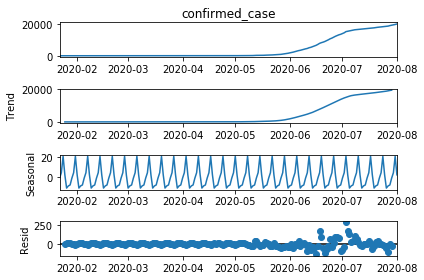

In [37]:
decomposition = seasonal_decompose(a.confirmed_case,model='additive')
#additive because multiplicative value doesn't consider 0 and negative value
fig=decomposition.plot()

1. Trend = general linear or non-linear component that changes over time but doesn't repeat
2. Seasonality = general linear or non-linear component that changes over time but do repeat
3. Noise = component within data which is not trend nor seasonal

### Adding Features

As algorithms can later detect which feature is more important and which are less. So, adding less important features wont harms but losing important features will

In [38]:
import datetime

data['dayofweek'] = data['Date'].dt.dayofweek
data['quarter'] = data['Date'].dt.quarter
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['dayofyear'] = data['Date'].dt.dayofyear
data['dayofmonth'] = data['Date'].dt.day
data['weekofyear'] = data['Date'].dt.weekofyear

In [39]:
data['confirmed_class_lag1']= data['confirmed_case'].shift(1)
data['confirmed_class_lag5']= data['confirmed_case'].shift(5)

In [40]:
#certain window is given within which required function is carrried and data is obtained
data['mean_2']= data['confirmed_case'].rolling(window=2).mean()
data['mean_4']= data['confirmed_case'].rolling(window=4).mean()

In [41]:
data['max_3']= data['confirmed_case'].rolling(window=3).max()
data['max_5']= data['confirmed_case'].rolling(window=5).max()

In [42]:
#without windows serially checking the data and giving data according to features
data['exp_4']= data['confirmed_case'].expanding().max()

In [43]:
data.head()

,Province/State,Country,Date,confirmed_case,Death_case,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,confirmed_class_lag1,confirmed_class_lag5,mean_2,mean_4,max_3,max_5,exp_4
0,,Afghanistan,2020-01-22,0,0,2,1,1,2020,22,22,4,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,,Albania,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,NaN,NaN,NaN,0.0
2,,Algeria,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,,Andorra,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,0.0,0.0,NaN,0.0
4,,Angola,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,0.0,0.0,0.0,0.0


### Resampling

Resampling can be done if we want to like predict montly from daiy data or vice-versa. And can also be used as new feautures

In [44]:
b=a.reset_index()
b

,Date,confirmed_case
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,1
4,2020-01-26,1
5,2020-01-27,1
6,2020-01-28,1
7,2020-01-29,1
8,2020-01-30,1
9,2020-01-31,1


In [45]:
c=b.resample('M',on='Date').mean().reset_index()
c

,Date,confirmed_case
0,2020-01-31,0.700000
1,2020-02-29,1.000000
2,2020-03-31,1.806452
3,2020-04-30,26.400000
4,2020-05-31,435.677419
5,2020-06-30,7011.733333
6,2020-07-31,17275.322581
7,2020-08-31,20086.000000


In [46]:
d =c.resample('D',on="Date").mean()
d

,confirmed_case
Date,
2020-01-31,0.700000
2020-02-01,NaN
2020-02-02,NaN
2020-02-03,NaN
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,NaN
2020-02-07,NaN
2020-02-08,NaN


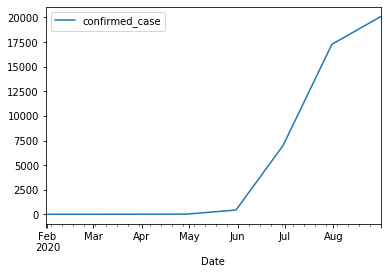

In [47]:
e=d.interpolate(method='linear')
e.plot()

In [48]:
e

,confirmed_case
Date,
2020-01-31,0.700000
2020-02-01,0.710345
2020-02-02,0.720690
2020-02-03,0.731034
2020-02-04,0.741379
2020-02-05,0.751724
2020-02-06,0.762069
2020-02-07,0.772414
2020-02-08,0.782759


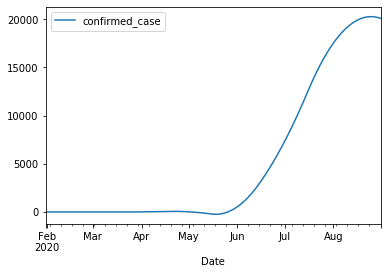

In [49]:
f=d.interpolate(method='spline',order=2)
f.plot()

In [50]:
data.head()

,Province/State,Country,Date,confirmed_case,Death_case,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,confirmed_class_lag1,confirmed_class_lag5,mean_2,mean_4,max_3,max_5,exp_4
0,,Afghanistan,2020-01-22,0,0,2,1,1,2020,22,22,4,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,,Albania,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,NaN,NaN,NaN,0.0
2,,Algeria,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,,Andorra,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,0.0,0.0,NaN,0.0
4,,Angola,2020-01-22,0,0,2,1,1,2020,22,22,4,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [51]:
X_confirmed = data.drop(['Death_case'],axis=1)
#y= data['confirmed_case']
#y.shape
X_confirmed_nepal=X_confirmed.query('Country=="Nepal"').groupby("Date").sum().reset_index()

In [52]:
X_confirmed_nepal.shape

(193, 16)

In [53]:
x = X_confirmed_nepal[X_confirmed_nepal['Date'] <= '2020-07-25']
y= x['confirmed_case']
x= x.drop(['confirmed_case'],axis=1).set_index(['Date'])
x_test = X_confirmed_nepal[X_confirmed_nepal['Date'] >'2020-07-25']
y_test =x_test['confirmed_case']
x_test = x_test.drop(['confirmed_case'],axis=1).set_index(['Date'])

In [54]:
x.shape

(186, 14)

In [55]:
from sklearn.model_selection import TimeSeriesSplit


In [56]:
n_folds = 10
fold=TimeSeriesSplit(n_splits=n_folds,max_train_size=50)

In [57]:
for f,(train_idx,test_idx) in enumerate(fold.split(x,y)):
    print("Fold No. {} has train_idx {} and test idx:{}".format(f,len(train_idx),len(test_idx)))

Fold No. 0 has train_idx 26 and test idx:16
Fold No. 1 has train_idx 42 and test idx:16
Fold No. 2 has train_idx 50 and test idx:16
Fold No. 3 has train_idx 50 and test idx:16
Fold No. 4 has train_idx 50 and test idx:16
Fold No. 5 has train_idx 50 and test idx:16
Fold No. 6 has train_idx 50 and test idx:16
Fold No. 7 has train_idx 50 and test idx:16
Fold No. 8 has train_idx 50 and test idx:16
Fold No. 9 has train_idx 50 and test idx:16


### Lightgbm

It is also gradient boosting model. But is quite faster than other gradient boosting model so it is called light and is also quite effective. It is histogram based model as XGBoost.

Concept:
1. They use leaf wise split i..e uses leaf with minimum loss for split. 
2. For finding best split we must try on various tricks and find appropriate ones.
3. The amount of time it takes to build a tree is proportional to the number of splits that have to be evaluated. Often, small changes in the split don't make much of a difference in the performance of the tree. Histogram-based methods take advantage of this fact by grouping features into a set of bins and perform splitting on the bins instead of the features. This is equivalent to subsampling the number of splits that the model evaluates. Since the features can be binned before building each tree, this method can greatly speed up training, reducing the computational complexity to O(n_{data} n_{bins}) .

Challenges is how many bins to be selected.  with the tree_method set to hist will it computes the bins at the beginning of training and reuse the same bins throughout the entire training process.

4. Ignores sparse input(data having value 0 as in NLP tf-idf approaches). It removes these data during split finding and then join which ever split has lowest loss. Fot these parameters should be used use_missing=True and zero_as_missing=True
5. It subsamples the data. Meaning data which already have smaller gradient or close to local minima are not trained and data with larger gradient are trained more. But it leads to biasness of data, so lightgbm samples the smaller gradient data and also assign weights to the sample to reduce baisness.



In [58]:
import lightgbm as lgb

In [74]:
params = {'max_bin': 10,
         'num_leaves': 50,
          'min_child_weight': 0.034,
          'feature_fraction': 1,
          'bagging_fraction': 1,
          'min_data_in_leaf': 10,
          'objective': 'regression',
          'max_depth': 5,
          'learning_rate': 0.001,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'rmse',
          "verbosity": -1,
          'reg_alpha': 0.3899,
          'reg_lambda': 0.648,
          'random_state': 222,
         }

In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-22 to 2020-07-25
Data columns (total 14 columns):
dayofweek               186 non-null int64
quarter                 186 non-null int64
month                   186 non-null int64
year                    186 non-null int64
dayofyear               186 non-null int64
dayofmonth              186 non-null int64
weekofyear              186 non-null int64
confirmed_class_lag1    186 non-null float64
confirmed_class_lag5    186 non-null float64
mean_2                  186 non-null float64
mean_4                  186 non-null float64
max_3                   186 non-null float64
max_5                   186 non-null float64
exp_4                   186 non-null float64
dtypes: float64(7), int64(7)
memory usage: 21.8 KB


In [75]:
import numpy as np
from sklearn import metrics
import gc

mean_score=[]
feature_importances = pd.DataFrame()
feature_importances['feature'] = x.columns
for f,(train_idx,test_idx) in enumerate(fold.split(x,y)):
    X_train,X_valid = x.iloc[train_idx],x.iloc[test_idx]
    y_train,y_valid = y.iloc[train_idx],y.iloc[test_idx]
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)
    clf = lgb.train(params, dtrain, 10000,valid_sets = [dtrain, dvalid], verbose_eval=100)
    feature_importances[f'fold_{f + 1}'] = clf.feature_importance()
    y_pred_valid = clf.predict(X_valid,num_iteration=clf.best_iteration)
    val_score = np.sqrt(metrics.mean_squared_error(y_pred_valid, y_valid))
    print(f'val rmse score is {val_score}')
    mean_score.append(val_score)

    gc.collect()
print('mean rmse score over folds is',np.mean(mean_score))


[100]	training's rmse: 0.314865	valid_1's rmse: 0.107041
[200]	training's rmse: 0.310906	valid_1's rmse: 0.0994617
[300]	training's rmse: 0.307513	valid_1's rmse: 0.0925775
[400]	training's rmse: 0.304607	valid_1's rmse: 0.0863244
[500]	training's rmse: 0.302116	valid_1's rmse: 0.0806445
[600]	training's rmse: 0.299979	valid_1's rmse: 0.0754854
[700]	training's rmse: 0.298144	valid_1's rmse: 0.0707993
[800]	training's rmse: 0.296568	valid_1's rmse: 0.0665427
[900]	training's rmse: 0.295211	valid_1's rmse: 0.0626764
[1000]	training's rmse: 0.294042	valid_1's rmse: 0.0591645
[1100]	training's rmse: 0.293032	valid_1's rmse: 0.0559746
[1200]	training's rmse: 0.29216	valid_1's rmse: 0.0530771
[1300]	training's rmse: 0.291404	valid_1's rmse: 0.0504452
[1400]	training's rmse: 0.290748	valid_1's rmse: 0.0480546
[1500]	training's rmse: 0.290178	valid_1's rmse: 0.0458832
[1600]	training's rmse: 0.289681	valid_1's rmse: 0.0439109
[1700]	training's rmse: 0.289248	valid_1's rmse: 0.0421193
[1800]	t

[4900]	training's rmse: 0.174159	valid_1's rmse: 0.0490549
[5000]	training's rmse: 0.173387	valid_1's rmse: 0.0495088
[5100]	training's rmse: 0.172634	valid_1's rmse: 0.0499604
[5200]	training's rmse: 0.171897	valid_1's rmse: 0.0503808
[5300]	training's rmse: 0.17118	valid_1's rmse: 0.0508285
[5400]	training's rmse: 0.170481	valid_1's rmse: 0.0512735
[5500]	training's rmse: 0.169797	valid_1's rmse: 0.0516826
[5600]	training's rmse: 0.169131	valid_1's rmse: 0.0521023
[5700]	training's rmse: 0.16848	valid_1's rmse: 0.0524945
[5800]	training's rmse: 0.167843	valid_1's rmse: 0.0528918
[5900]	training's rmse: 0.167214	valid_1's rmse: 0.0533114
[6000]	training's rmse: 0.166603	valid_1's rmse: 0.0537081
[6100]	training's rmse: 0.166002	valid_1's rmse: 0.0540981
[6200]	training's rmse: 0.165416	valid_1's rmse: 0.0544993
[6300]	training's rmse: 0.164839	valid_1's rmse: 0.0549148
[6400]	training's rmse: 0.164277	valid_1's rmse: 0.0553145
[6500]	training's rmse: 0.163726	valid_1's rmse: 0.0557184

[1700]	training's rmse: 0.772939	valid_1's rmse: 14.6388
[1800]	training's rmse: 0.757504	valid_1's rmse: 14.5903
[1900]	training's rmse: 0.744248	valid_1's rmse: 14.5459
[2000]	training's rmse: 0.732887	valid_1's rmse: 14.5053
[2100]	training's rmse: 0.722842	valid_1's rmse: 14.4766
[2200]	training's rmse: 0.713361	valid_1's rmse: 14.4614
[2300]	training's rmse: 0.704665	valid_1's rmse: 14.447
[2400]	training's rmse: 0.696692	valid_1's rmse: 14.4334
[2500]	training's rmse: 0.689389	valid_1's rmse: 14.4206
[2600]	training's rmse: 0.682701	valid_1's rmse: 14.4084
[2700]	training's rmse: 0.676547	valid_1's rmse: 14.3976
[2800]	training's rmse: 0.67081	valid_1's rmse: 14.3884
[2900]	training's rmse: 0.665496	valid_1's rmse: 14.3798
[3000]	training's rmse: 0.660558	valid_1's rmse: 14.372
[3100]	training's rmse: 0.656251	valid_1's rmse: 14.3651
[3200]	training's rmse: 0.652256	valid_1's rmse: 14.3587
[3300]	training's rmse: 0.648525	valid_1's rmse: 14.3529
[3400]	training's rmse: 0.644977	v

[7300]	training's rmse: 2.45895	valid_1's rmse: 41.5656
[7400]	training's rmse: 2.44029	valid_1's rmse: 41.5411
[7500]	training's rmse: 2.42193	valid_1's rmse: 41.516
[7600]	training's rmse: 2.40379	valid_1's rmse: 41.4917
[7700]	training's rmse: 2.38594	valid_1's rmse: 41.4674
[7800]	training's rmse: 2.36831	valid_1's rmse: 41.4444
[7900]	training's rmse: 2.35097	valid_1's rmse: 41.4208
[8000]	training's rmse: 2.33383	valid_1's rmse: 41.3969
[8100]	training's rmse: 2.31691	valid_1's rmse: 41.3743
[8200]	training's rmse: 2.30021	valid_1's rmse: 41.3511
[8300]	training's rmse: 2.28373	valid_1's rmse: 41.3289
[8400]	training's rmse: 2.26747	valid_1's rmse: 41.3066
[8500]	training's rmse: 2.25143	valid_1's rmse: 41.2846
[8600]	training's rmse: 2.23561	valid_1's rmse: 41.2623
[8700]	training's rmse: 2.22001	valid_1's rmse: 41.2409
[8800]	training's rmse: 2.20462	valid_1's rmse: 41.2193
[8900]	training's rmse: 2.18944	valid_1's rmse: 41.1985
[9000]	training's rmse: 2.17444	valid_1's rmse: 4

[2300]	training's rmse: 43.3579	valid_1's rmse: 1668.98
[2400]	training's rmse: 42.4319	valid_1's rmse: 1667.93
[2500]	training's rmse: 41.5986	valid_1's rmse: 1666.94
[2600]	training's rmse: 40.8541	valid_1's rmse: 1666.03
[2700]	training's rmse: 40.1855	valid_1's rmse: 1665.15
[2800]	training's rmse: 39.5811	valid_1's rmse: 1664.32
[2900]	training's rmse: 39.0344	valid_1's rmse: 1663.53
[3000]	training's rmse: 38.5427	valid_1's rmse: 1662.78
[3100]	training's rmse: 38.1046	valid_1's rmse: 1662.05
[3200]	training's rmse: 37.6932	valid_1's rmse: 1661.46
[3300]	training's rmse: 37.304	valid_1's rmse: 1660.94
[3400]	training's rmse: 36.9426	valid_1's rmse: 1660.52
[3500]	training's rmse: 36.6078	valid_1's rmse: 1660.18
[3600]	training's rmse: 36.2831	valid_1's rmse: 1659.86
[3700]	training's rmse: 35.9693	valid_1's rmse: 1659.53
[3800]	training's rmse: 35.664	valid_1's rmse: 1659.24
[3900]	training's rmse: 35.3698	valid_1's rmse: 1658.93
[4000]	training's rmse: 35.113	valid_1's rmse: 165

[7500]	training's rmse: 230.316	valid_1's rmse: 4937.5
[7600]	training's rmse: 229.414	valid_1's rmse: 4937.32
[7700]	training's rmse: 228.512	valid_1's rmse: 4937.15
[7800]	training's rmse: 227.625	valid_1's rmse: 4936.91
[7900]	training's rmse: 226.55	valid_1's rmse: 4937.34
[8000]	training's rmse: 225.269	valid_1's rmse: 4936.49
[8100]	training's rmse: 224.056	valid_1's rmse: 4935.26
[8200]	training's rmse: 222.909	valid_1's rmse: 4934.11
[8300]	training's rmse: 221.824	valid_1's rmse: 4933.02
[8400]	training's rmse: 220.751	valid_1's rmse: 4932.36
[8500]	training's rmse: 219.572	valid_1's rmse: 4933.54
[8600]	training's rmse: 218.434	valid_1's rmse: 4934.65
[8700]	training's rmse: 217.327	valid_1's rmse: 4935.86
[8800]	training's rmse: 216.259	valid_1's rmse: 4937.05
[8900]	training's rmse: 215.25	valid_1's rmse: 4938.31
[9000]	training's rmse: 214.266	valid_1's rmse: 4939.6
[9100]	training's rmse: 213.311	valid_1's rmse: 4940.89
[9200]	training's rmse: 212.372	valid_1's rmse: 4942

[2300]	training's rmse: 861.065	valid_1's rmse: 3383.27
[2400]	training's rmse: 813.578	valid_1's rmse: 3283.81
[2500]	training's rmse: 771.807	valid_1's rmse: 3193.18
[2600]	training's rmse: 735.049	valid_1's rmse: 3110.14
[2700]	training's rmse: 702.861	valid_1's rmse: 3034.49
[2800]	training's rmse: 674.775	valid_1's rmse: 2965.5
[2900]	training's rmse: 650.35	valid_1's rmse: 2902.49
[3000]	training's rmse: 629.206	valid_1's rmse: 2845.07
[3100]	training's rmse: 610.939	valid_1's rmse: 2792.59
[3200]	training's rmse: 595.211	valid_1's rmse: 2744.66
[3300]	training's rmse: 581.663	valid_1's rmse: 2701.07
[3400]	training's rmse: 569.901	valid_1's rmse: 2660.65
[3500]	training's rmse: 559.805	valid_1's rmse: 2624.28
[3600]	training's rmse: 551.072	valid_1's rmse: 2591.01
[3700]	training's rmse: 543.344	valid_1's rmse: 2561.01
[3800]	training's rmse: 536.58	valid_1's rmse: 2533.96
[3900]	training's rmse: 530.485	valid_1's rmse: 2509.09
[4000]	training's rmse: 525.063	valid_1's rmse: 248

In [72]:
def evaluate(x,y):
    pred = clf.predict(x,num_iteration=clf.best_iteration)
    val_score = np.sqrt(metrics.mean_squared_error(pred, y))
    print(f'test rmse score is {val_score}')

In [76]:
evaluate(x_test,y_test)

test rmse score is 4156.240686504109


In [64]:
def predict_future(x):
    pred = clf.predict(x,num_iteration=clf.best_iteration)
    return pred

In [65]:
x_test.tail()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,confirmed_class_lag1,confirmed_class_lag5,mean_2,mean_4,max_3,max_5,exp_4
Date,,,,,,,,,,,,,,
2020-07-28,1,3,7,2020,210,28,31,1917.0,117.0,10490.0,11329.00,21387.0,21387.0,4290337.0
2020-07-29,2,3,7,2020,211,29,31,1986.0,120.0,10629.5,11622.00,22213.0,22213.0,4356206.0
2020-07-30,3,3,7,2020,212,30,31,2052.0,120.0,10799.5,11968.50,23259.0,23259.0,4426982.0
2020-07-31,4,3,7,2020,213,31,31,2129.0,120.0,10950.0,12323.75,24322.0,24322.0,4495015.0
2020-08-01,5,3,8,2020,214,1,31,2224.0,120.0,11155.0,12630.75,25015.0,25015.0,4562038.0


In [66]:
range(fold.n_splits)

range(0, 10)

In [67]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(fold.n_splits)]].mean(axis=1)

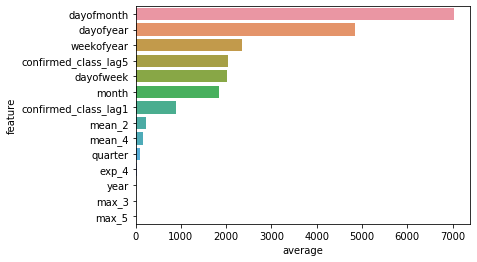

In [68]:
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(20), x='average', y='feature');

### Conclusion:

I noticed that when trained on larger data i.e. more older data error was increasing rapidly and when only trained on several recent data loss was comparatively small and acceptable. 

Further parameters:
1. Feature Fraction allows us to use how many % of feature while training.
2. Bagging Fraction allows us to use how many % of data while training.
3. smaller max_bin ,num_leaves and max_depth for avoiding overfitting.
4. reg_alpha and reg_lambda regularizing factors.
5. Due to smaller data, lower learning rate results better.